In [1]:
# K Nearest Neighbor (KNN) - Drug Classification
# It is used for both classification and regression task
# It finds k closest data points and make decision based on their value

In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
df = pd.read_csv('../data/drug_classification.csv')

In [4]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [5]:
df.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug_Type        5
dtype: int64

In [6]:
df['Drug_Type'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug_Type    200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug_Type      0
dtype: int64

In [10]:
# Checking if there is any invalid data
for col in df:
    print(col, ':', df[col].unique(), '\n')

Age : [23 47 28 61 22 49 41 60 43 34 74 50 16 69 32 57 63 48 33 31 39 45 18 65
 53 46 15 73 58 66 37 68 67 62 24 26 40 38 29 17 54 70 36 19 64 59 51 42
 56 20 72 35 52 55 30 21 25] 

Sex : ['F' 'M'] 

BP : ['HIGH' 'LOW' 'NORMAL'] 

Cholesterol : ['HIGH' 'NORMAL'] 

Na_to_K : [25.355 13.093 10.114  7.798 18.043  8.607 16.275 11.037 15.171 19.368
 11.767 19.199 15.376 20.942 12.703 15.516 11.455 13.972  7.298 25.974
 19.128 25.917 30.568 15.036 33.486 18.809 30.366  9.381 22.697 17.951
  8.75   9.567 11.014 31.876 14.133  7.285  9.445 13.938  9.709  9.084
 19.221 14.239 15.79  12.26  12.295  8.107 13.091 10.291 31.686 19.796
 19.416 10.898 27.183 18.457 10.189 14.16  11.34  27.826 10.091 18.703
 29.875  9.475 20.693  8.37  13.303 27.05  12.856 10.832 24.658 24.276
 13.967 19.675 10.605 22.905 17.069 20.909 11.198 19.161 13.313 10.84
 13.934  7.761  9.712 11.326 10.067 13.935 13.597 15.478 23.091 17.211
 16.594 15.156 29.45  29.271 15.015 11.424 38.247 25.395 35.639 16.725
 11.871 12.854 

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df_copy = df.copy()

In [15]:
# Converting categorical variable into numerical categories
df_copy['Sex'] = df_copy.Sex.replace({'M': 1, 'F': 2})

In [16]:
df_copy

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,1,HIGH,HIGH,25.355,DrugY
1,47,2,LOW,HIGH,13.093,drugC
2,47,2,LOW,HIGH,10.114,drugC
3,28,1,NORMAL,HIGH,7.798,drugX
4,61,1,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,1,LOW,HIGH,11.567,drugC
196,16,2,LOW,HIGH,12.006,drugC
197,52,2,NORMAL,HIGH,9.894,drugX
198,23,2,NORMAL,NORMAL,14.020,drugX


In [19]:
df_copy['BP'] = df_copy.BP.replace({'LOW': 2, 'NORMAL': 3, 'HIGH': 4})
df_copy['Cholesterol'] = df_copy.Cholesterol.replace({'NORMAL': 2, 'HIGH': 3})
df_copy['Drug_Type'] = df_copy.Drug_Type.replace({'drugA': 1, 'drugB': 2, 'drugC': 3, 'drugX': 4, 'DrugY': 5})

C:\Users\kiran_krmtm55\AppData\Local\Temp\ipykernel_21496\3110203551.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['Drug_Type'] = df_copy.Drug_Type.replace({'drugA': 1, 'drugB': 2, 'drugC': 3, 'drugX': 4, 'DrugY': 5})


In [20]:
df_copy

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,1,4,3,25.355,5
1,47,2,2,3,13.093,3
2,47,2,2,3,10.114,3
3,28,1,3,3,7.798,4
4,61,1,2,3,18.043,5
...,...,...,...,...,...,...
195,56,1,2,3,11.567,3
196,16,2,2,3,12.006,3
197,52,2,3,3,9.894,4
198,23,2,3,2,14.020,4


In [21]:
df_copy['Drug_Type'].unique()

array([5, 3, 4, 1, 2])

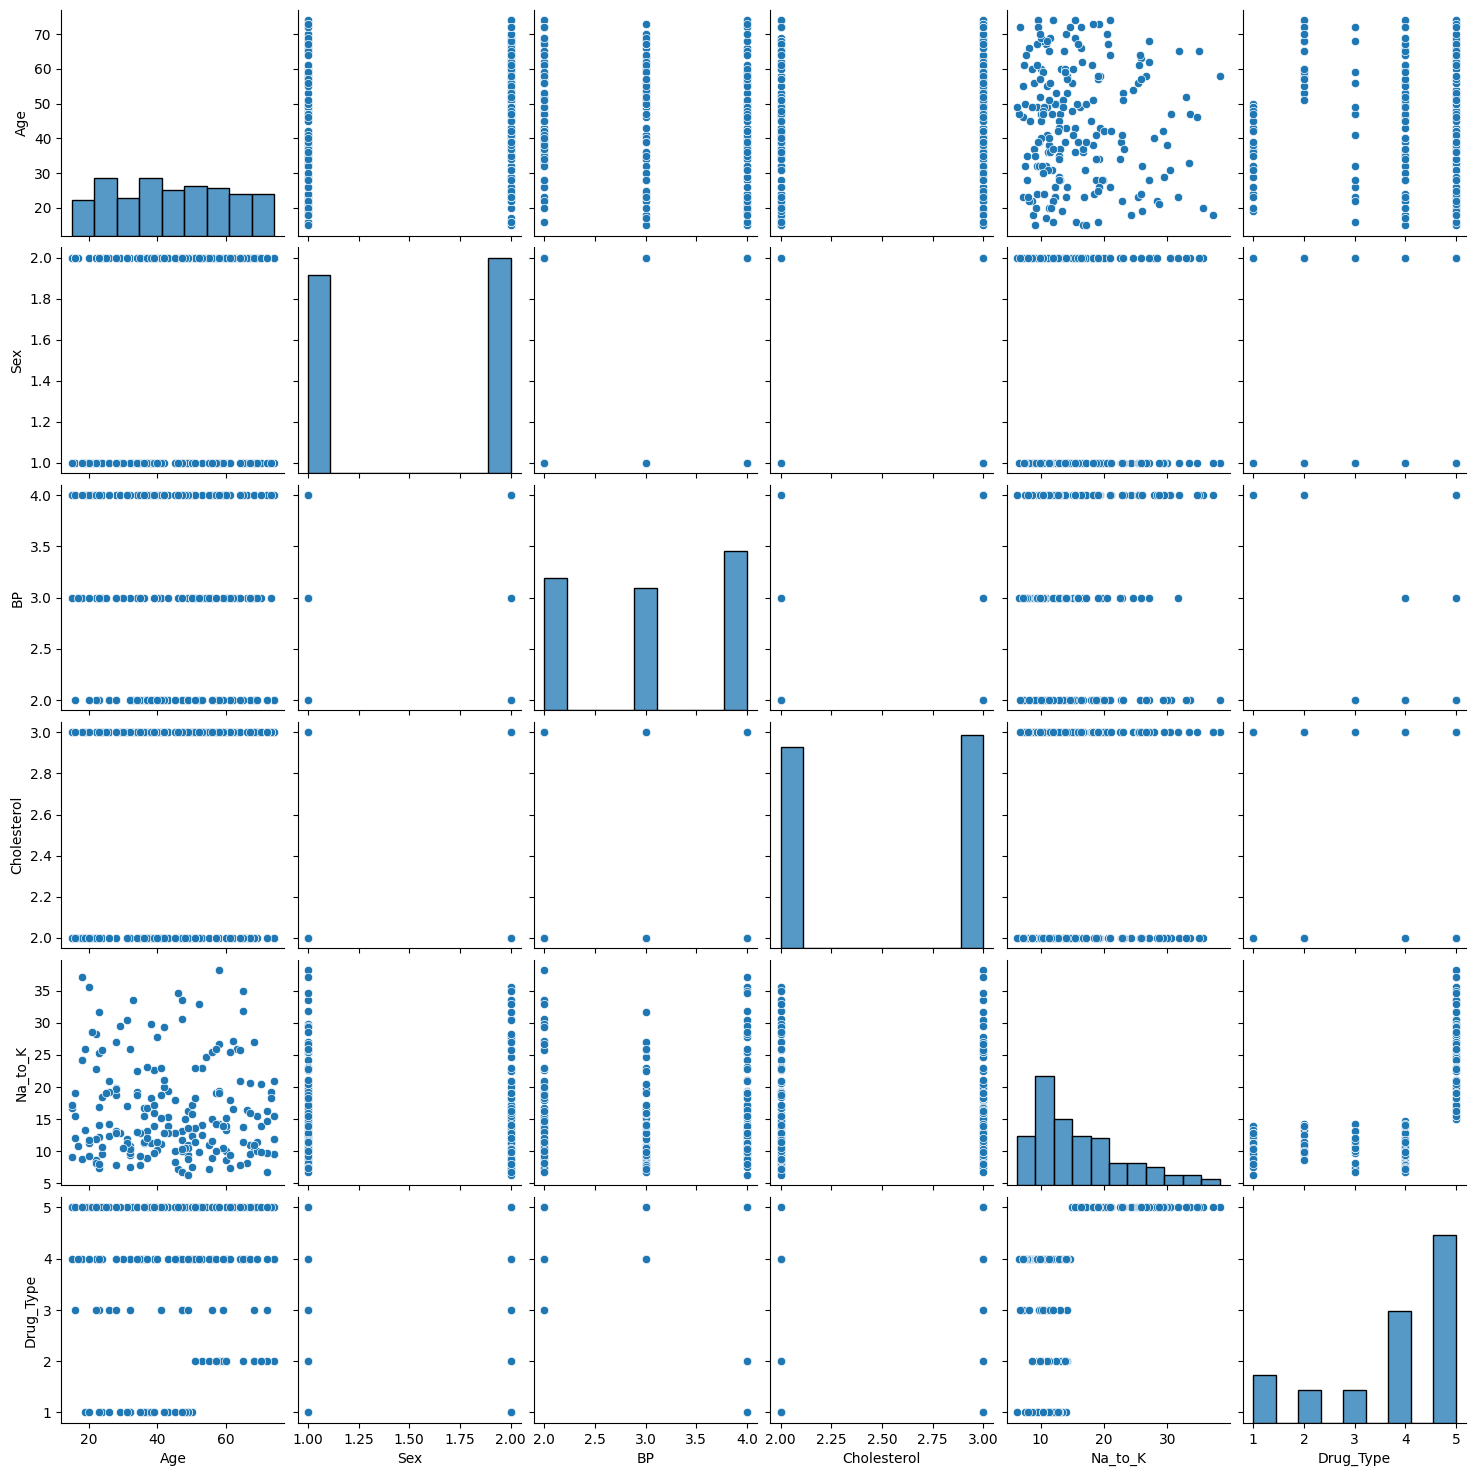

In [22]:
sns.pairplot(df_copy)

In [23]:
features = ['Age','Sex', 'BP', 'Cholesterol', 'Na_to_K']

In [24]:
X = df_copy[features]
y = df_copy['Drug_Type']

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)

In [27]:
knn

KNeighborsClassifier()

In [28]:
# split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
# Create the parameter grid
param_grid = {
    'n_neighbors': np.arange(1, 15),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
} 

In [30]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 'weights': ['uniform', 'distance'],
 'metric': ['euclidean', 'manhattan']}

In [31]:
# Grid Search CV
from sklearn.model_selection import GridSearchCV

In [32]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [33]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [34]:
# cv_results_ attribute
grid_search.cv_results_

{'mean_fit_time': array([0.06384964, 0.0418973 , 0.00368223, 0.00383887, 0.00343714,
        0.00369434, 0.00359221, 0.00322733, 0.00327106, 0.0032968 ,
        0.00344338, 0.00333467, 0.00287557, 0.00390959, 0.00327697,
        0.00366569, 0.0040545 , 0.00350599, 0.00327506, 0.00371046,
        0.0034502 , 0.00338178, 0.00325336, 0.00298758, 0.00354238,
        0.0029314 , 0.00313177, 0.00301113, 0.00321455, 0.00313601,
        0.00332704, 0.00313087, 0.00355058, 0.0038516 , 0.00314999,
        0.00398393, 0.00397253, 0.0034646 , 0.00379696, 0.00397477,
        0.00321398, 0.00342913, 0.00409956, 0.00369177, 0.00311966,
        0.00304623, 0.00417509, 0.00364656, 0.00330887, 0.00387125,
        0.00492463, 0.00329275, 0.00298133, 0.00432792, 0.00316443,
        0.00268345]),
 'std_fit_time': array([1.59306938e-03, 2.87035085e-02, 5.95401350e-04, 5.57656288e-04,
        4.45999934e-04, 9.77991307e-04, 5.64432920e-04, 1.65289230e-04,
        4.86911108e-04, 3.58208928e-04, 4.05296314e-0

In [35]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.063850,0.001593,0.059228,0.001733,euclidean,1,uniform,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.71875,0.71875,0.71875,0.84375,0.56250,0.71250,0.089268,16
1,0.041897,0.028704,0.026647,0.016905,euclidean,1,distance,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.71875,0.71875,0.71875,0.84375,0.56250,0.71250,0.089268,16
2,0.003682,0.000595,0.007551,0.000992,euclidean,2,uniform,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.75000,0.68750,0.53125,0.75000,0.59375,0.66250,0.087052,35
3,0.003839,0.000558,0.005201,0.001244,euclidean,2,distance,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.71875,0.71875,0.71875,0.84375,0.56250,0.71250,0.089268,16
4,0.003437,0.000446,0.006125,0.000193,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.71875,0.65625,0.43750,0.78125,0.68750,0.65625,0.116927,41
5,0.003694,0.000978,0.004125,0.000882,euclidean,3,distance,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.71875,0.62500,0.62500,0.81250,0.65625,0.68750,0.071261,23
6,0.003592,0.000564,0.006158,0.000583,euclidean,4,uniform,"{'metric': 'euclidean', 'n_neighbors': 4, 'wei...",0.65625,0.62500,0.50000,0.68750,0.71875,0.63750,0.075519,45
7,0.003227,0.000165,0.003725,0.000386,euclidean,4,distance,"{'metric': 'euclidean', 'n_neighbors': 4, 'wei...",0.68750,0.65625,0.56250,0.81250,0.71875,0.68750,0.081490,23
8,0.003271,0.000487,0.006436,0.000635,euclidean,5,uniform,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.65625,0.65625,0.43750,0.68750,0.62500,0.61250,0.089704,50
9,0.003297,0.000358,0.003564,0.000380,euclidean,5,distance,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.68750,0.71875,0.62500,0.75000,0.65625,0.68750,0.044194,23


In [36]:
grid_search.best_score_

np.float64(0.76875)

In [37]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': np.int64(9), 'weights': 'distance'}

<Axes: xlabel='param_n_neighbors', ylabel='mean_test_score'>

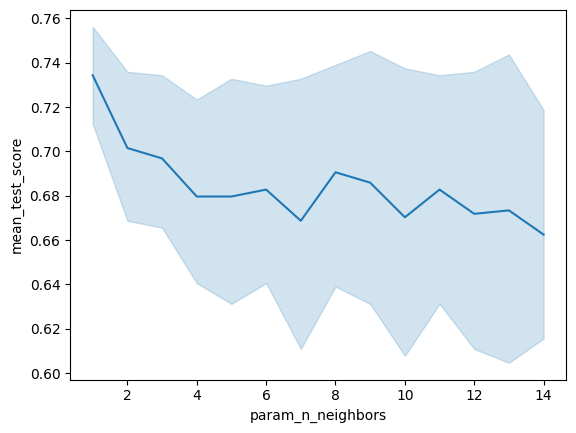

In [38]:
results['param_n_neighbors'] = results['param_n_neighbors'].astype('int')
sns.lineplot(x='param_n_neighbors', y='mean_test_score', data=results)

In [39]:
best_knn = grid_search.best_estimator_

In [40]:
# Testing using test dataset on best_knn

y_pred = best_knn.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy = accuracy_score(y_test, y_pred)

In [43]:
accuracy

0.8